<a href="https://www.kaggle.com/code/shivanshbhargav/titanic?scriptVersionId=281658703" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
dB = pd.read_csv('/kaggle/input/titanic/train.csv')

**EDA**

In [3]:
dB.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
dB.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
dB.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


fixing the NULL or NaN values

In [6]:
dB.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


<Axes: >

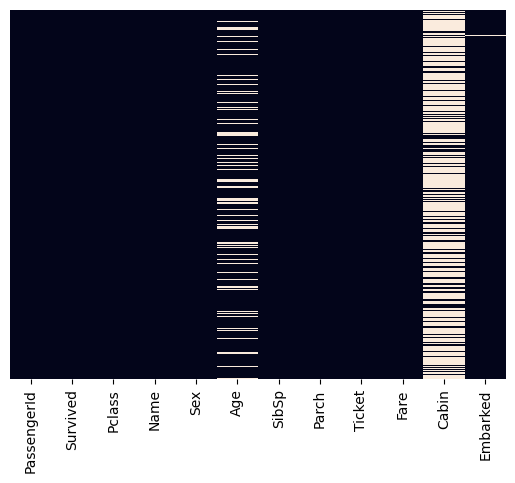

In [7]:
sns.heatmap(dB.isnull(), yticklabels=False, cbar=False)

cleaning Age and Cabin columns



<Axes: xlabel='Pclass', ylabel='Age'>

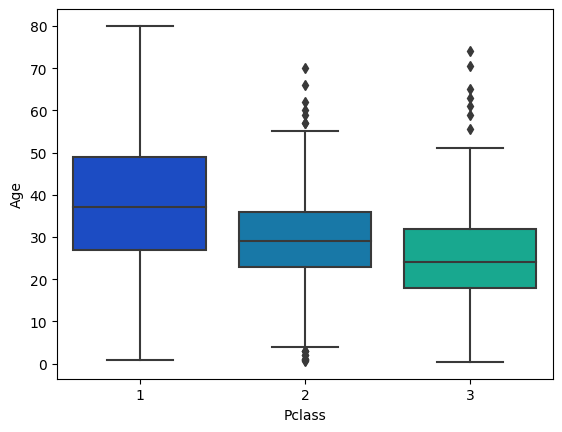

In [8]:
sns.boxplot(x='Pclass',y='Age',data=dB,palette='winter')

In [9]:
def impute_age(cols):
  Age = cols[0]
  Pclass = cols[1]

  if pd.isnull(Age):
    if Pclass == 1:
      return 37
    elif Pclass == 2:
      return 29
    else:
      return 24
  else:
    return Age

In [10]:
dB['Age'] = dB[['Age','Pclass']].apply(impute_age,axis=1)

/tmp/ipykernel_13/357331086.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  Age = cols[0]
/tmp/ipykernel_13/357331086.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  Pclass = cols[1]


<Axes: >

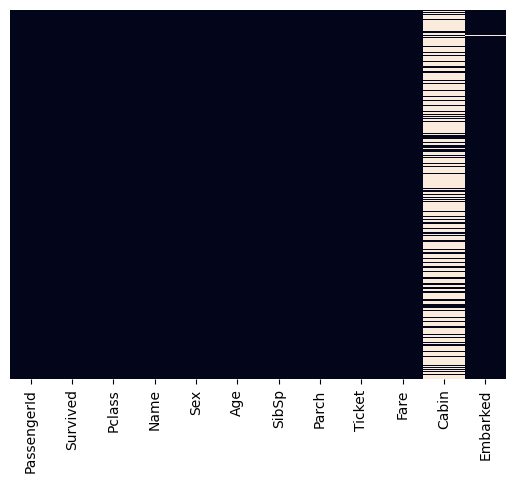

In [11]:
sns.heatmap(dB.isnull(), yticklabels=False, cbar=False)

Age column is now fixed, we filled all the NaN age values by the average age of that Pclass value



In [12]:
dB.drop('Cabin',axis=1,inplace=True)

<Axes: >

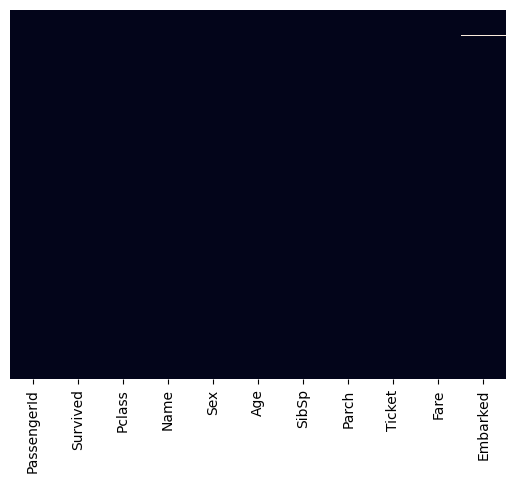

In [13]:
sns.heatmap(dB.isnull(), yticklabels=False, cbar=False)

In [14]:
dB.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


Before editing the data we'll check for releations b/w different variables

<Axes: xlabel='Survived', ylabel='count'>

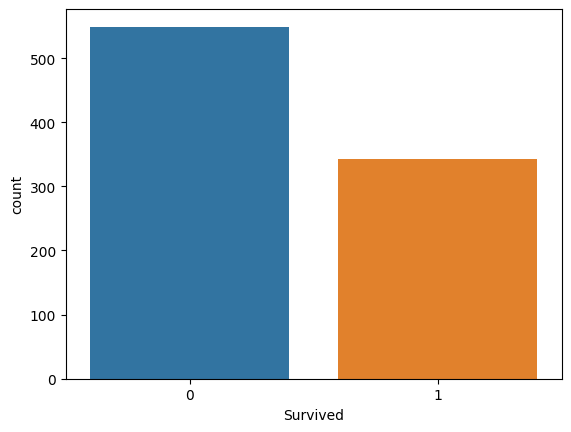

In [15]:
sns.countplot(x='Survived',data=dB)

<Axes: xlabel='Survived', ylabel='count'>

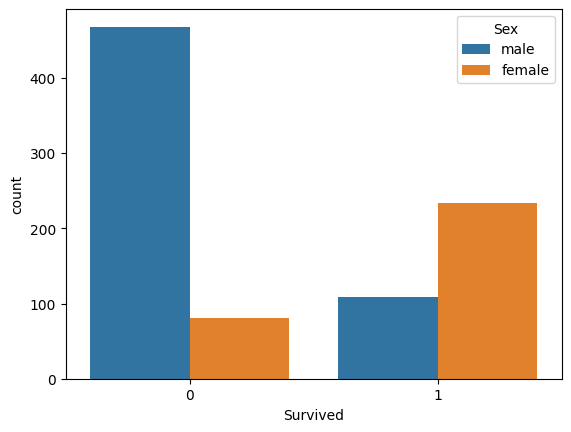

In [16]:
sns.countplot(x='Survived',hue='Sex',data=dB)

the counter plot shows that majority of the passengers who didn't survive were males as they're trying to save the women and children first

<Axes: xlabel='Survived', ylabel='count'>

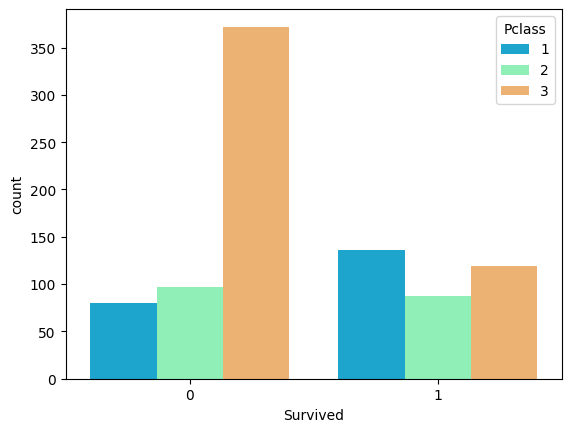

In [17]:
sns.countplot(x='Survived',hue='Pclass',data=dB,palette='rainbow')

this one shows that the majority of people who died belonged to 3rd class



<Axes: >

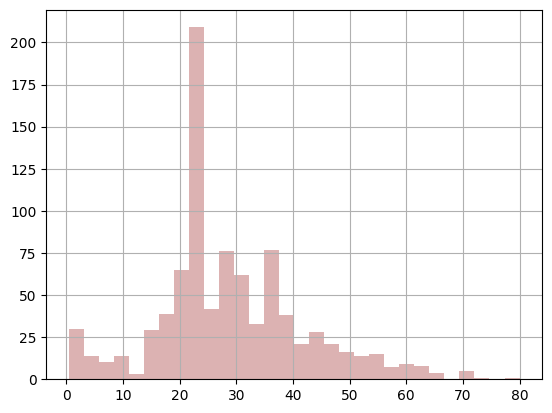

In [18]:
dB['Age'].hist(bins=30,color='darkred',alpha=0.3)

<Axes: xlabel='SibSp', ylabel='count'>

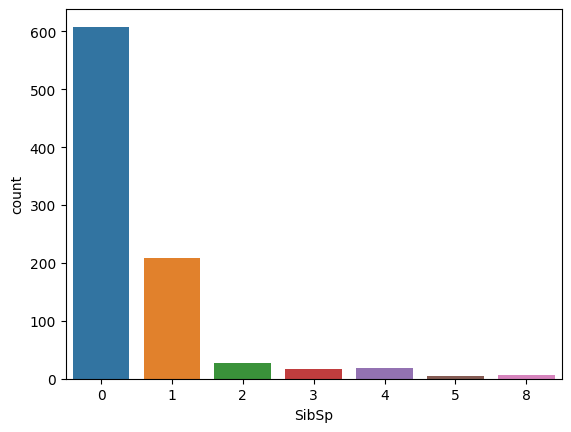

In [19]:
sns.countplot(x='SibSp',data=dB)

majority of the passengers onboard didn't have any spouse or siblings

# Removing unwanted columns and fixing the existing ones

Name,PassengerId and Ticket columns are irrelevant to our research so we will drop them

also Sex and Embarked columns will be converted into numerical columns for Model learning purposes




In [20]:
pd.get_dummies(dB['Embarked'],drop_first=True).head()

,Q,S
0,False,True
1,False,False
2,False,True
3,False,True
4,False,True


as we had 3 types of values in Embarked column get_dummies fuction made seperate columns for each type of value -1 with true and false as types of entries in them. When both the columns are false the third value is true. This will be very helpfull when we process the data through a model.



In [21]:
pd.get_dummies(dB['Sex'],drop_first=True).head()

,male
0,True
1,False
2,False
3,False
4,True


get_dummies did the same thing for Sex column by converting it's two types of entries(Male and Female) into one column(Male) and giving true(Male) or false(Female) as column entries.

In [22]:
sex = pd.get_dummies(dB['Sex'],drop_first=True)
embark = pd.get_dummies(dB['Embarked'],drop_first=True)

In [23]:
dB.drop(['Sex','Name','PassengerId','Embarked','Ticket'],axis=1,inplace=True)

In [24]:
dB.head()

,Survived,Pclass,Age,SibSp,Parch,Fare
0,0,3,22.0,1,0,7.2500
1,1,1,38.0,1,0,71.2833
2,1,3,26.0,0,0,7.9250
3,1,1,35.0,1,0,53.1000
4,0,3,35.0,0,0,8.0500


In [25]:
dB = pd.concat([dB,sex,embark],axis=1)

In [26]:
dB.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,22.0,1,0,7.2500,True,False,True
1,1,1,38.0,1,0,71.2833,False,False,False
2,1,3,26.0,0,0,7.9250,False,False,True
3,1,1,35.0,1,0,53.1000,False,False,True
4,0,3,35.0,0,0,8.0500,True,False,True


In [27]:

dB['male'] = dB['male'].astype(int)
dB['Q'] = dB['Q'].astype(int)
dB['S'] = dB['S'].astype(int)

dB.dropna(inplace=True)

Now that our data is ready we can apply Logistic Regression to predict our target variable, Survived.

EDA is complete from this point

# MODEL BUILDING

In [28]:
X = dB.drop('Survived', axis=1) 
y = dB['Survived']              

print(X.shape)

(891, 8)


# Random Forest Classifier

In [29]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

rf_model = RandomForestClassifier(random_state=42)

param_grid_rf = {
    'n_estimators': [100, 200],
    'max_depth': [5, 8, 12],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

grid_search_rf = GridSearchCV(estimator=rf_model, param_grid=param_grid_rf, cv=5, scoring='accuracy', n_jobs=-1, verbose=1)

grid_search_rf.fit(X, y)

print(f"Best RF Parameters: {grid_search_rf.best_params_}")
best_rf_model = grid_search_rf.best_estimator_

Fitting 5 folds for each of 24 candidates, totalling 120 fits
Best RF Parameters: {'max_depth': 12, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 200}


# XGBoost Tuning

In [30]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV

xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)

param_grid_xgb = {
    'n_estimators': [100, 200],
    'max_depth': [3, 5],
    'learning_rate': [0.01, 0.1]
}

grid_search_xgb = GridSearchCV(estimator=xgb_model, param_grid=param_grid_xgb, cv=5, scoring='accuracy', n_jobs=-1, verbose=1)

grid_search_xgb.fit(X, y)

print(f"Best XGB Parameters: {grid_search_xgb.best_params_}")
best_xgb_model = grid_search_xgb.best_estimator_

Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best XGB Parameters: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 200}


# ENSEMBLE: Voting Classifier

In [31]:
from sklearn.ensemble import VotingClassifier

ensemble_model = VotingClassifier(
    estimators=[
        ('rf', best_rf_model),
        ('xgb', best_xgb_model)
    ],
    voting='soft'
)


ensemble_model.fit(X, y)

VotingClassifier(estimators=[('rf',
                              RandomForestClassifier(max_depth=12,
                                                     min_samples_split=5,
                                                     n_estimators=200,
                                                     random_state=42)),
                             ('xgb',
                              XGBClassifier(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=None, device=None,
                                            early_stopping_rounds=None,
                                            enable_categorical=False,
                                            eval_metric='logloss',
                                            featur...
                                            grow_policy=None,
                                            importance_type=None,
                                            interaction_constraints=None,
                                            learning_rate=0.1, max_bin=None,
                                            max_cat_threshold=None,
                                            max_cat_to_onehot=None,
                                            max_delta_step=None, max_depth=3,
                                            max_leaves=None,
                                            min_child_weight=None, missing=nan,
                                            monotone_constraints=None,
                                            multi_strategy=None,
                                            n_estimators=200, n_jobs=None,
                                            num_parallel_tree=None,
                                            random_state=42, ...))],
                 voting='soft')

In [32]:
test_df = pd.read_csv('/kaggle/input/titanic/test.csv')

submission_ids = test_df['PassengerId']

test_df['Age'] = test_df[['Age', 'Pclass']].apply(impute_age, axis=1)

test_df['Fare'].fillna(test_df['Fare'].mean(), inplace=True)

test_df.drop('Cabin', axis=1, inplace=True)

sex_test = pd.get_dummies(test_df['Sex'], drop_first=True)
embark_test = pd.get_dummies(test_df['Embarked'], drop_first=True)

test_df.drop(['Sex', 'Embarked', 'Name', 'Ticket', 'PassengerId'], axis=1, inplace=True)

dB_test = pd.concat([test_df, sex_test, embark_test], axis=1)

for col in X.columns:
    if col not in dB_test.columns:
        dB_test[col] = 0

dB_test = dB_test[X.columns]

final_predictions = ensemble_model.predict(dB_test)

submission = pd.DataFrame({
    'PassengerId': submission_ids,
    'Survived': final_predictions
})

submission['Survived'] = submission['Survived'].astype(int)

submission.to_csv('titanic_submission.csv', index=False)

print("Submission file 'titanic_submission.csv' created successfully!")
print(submission.head()) 

Submission file 'titanic_submission.csv' created successfully!
   PassengerId  Survived
0          892         0
1          893         0
2          894         0
3          895         0
4          896         0


/tmp/ipykernel_13/357331086.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  Age = cols[0]
/tmp/ipykernel_13/357331086.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  Pclass = cols[1]
/tmp/ipykernel_13/3644411131.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inpl